# Import System Context & Install Python Package

In [1]:
import sys
!{sys.executable} -m pip install tensorflow scikit-image opencv-python numpy matplotlib scipy Pillow ImageHash latex


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


# Data Preprocessing

### 1.Path Variable Declaration

In [2]:
import os
notebook_path = os.path.abspath("CNN Implementation for Poisonous Mushroom Classification.ipynb")
testing_path = os.path.join(os.path.dirname(notebook_path), "Documents/mushrooms_by_edibility")
raw_edible_path = os.path.join(os.path.dirname(notebook_path), "Documents/mushrooms_by_edibility/raw_data/edible")
raw_poisonous_path = os.path.join(os.path.dirname(notebook_path), "Documents/mushrooms_by_edibility/raw_data/poisonous")
reduced_edible_path = os.path.join(os.path.dirname(notebook_path), "Documents/mushrooms_by_edibility/reduced_data/edible")
reduced_poisonous_path = os.path.join(os.path.dirname(notebook_path), "Documents/mushrooms_by_edibility/reduced_data/poisonous")
clean_edible_path = os.path.join(os.path.dirname(notebook_path), "Documents/mushrooms_by_edibility/clean_data/edible")
clean_poisonous_path = os.path.join(os.path.dirname(notebook_path), "Documents/mushrooms_by_edibility/clean_data/poisonous")
augmented_edible_path = os.path.join(os.path.dirname(notebook_path), "Documents/mushrooms_by_edibility/augmented_data/edible")
augmented_poisonous_path = os.path.join(os.path.dirname(notebook_path), "Documents/mushrooms_by_edibility/augmented_data/poisonous")
dataset_directory = os.path.join(os.path.dirname(notebook_path), "Documents/mushrooms_by_edibility/augmented_data")



### 2.Data Cleaning

In [3]:
import os
from PIL import Image

# Fungsi Mengecek Apakah File Tersebut Adalah File Gambar Atau Bukan
def is_image_file(filename):
    return filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))

# Fungsi Untuk Mengecek File Gambar Tersebut Corrupted Atau Tidak
def is_image_corrupted(image_path):
    print(image_path)
    try:
        im = Image.open(image_path)
        im.verify()
        im.close()
        return False
    except (IOError, OSError, Image.DecompressionBombError):
        return True

# Fungsi Untuk Menjalankan Loop Di Dalam Directory Dan Mengecek Apakah File Tersebut Corrupt
def clean_image_dataset(dataset_dir):
#     print(dataset_dir)
    for root, dirs, files in os.walk(dataset_dir):
        print(files)
        for file in files:
#             print(file)
            if is_image_file(file):
                image_path = os.path.join(root, file)
#                 print(image_path)
                if is_image_corrupted(image_path):
                    os.remove(image_path)
                    print(f"Removed corrupted image: {image_path}")


clean_image_dataset(raw_edible_path)
clean_image_dataset(raw_poisonous_path)

['316_3-veDuUcjlY.jpeg', '0272_siU7BBeYOsI.jpeg', '278_010rYw4FvoY.jpeg', '331_tw1BX2kCXR8.jpeg', '324_nslhbQyQ1Gk.jpeg', '208_s4_4O2ZZZq0.jpeg', '173_gdkvJBa2bQw.jpeg', '0310_Y7faW_iy5OA.jpeg', '0257_HOuyMmdxRHE.jpeg', '0319_h3Zl6wKFTk8.jpeg', '0043_dWwubaDOSfI.jpeg', '0149_sxoA5Z7iX10.jpeg', '204_qCwZYibeV20.jpeg', '074_DYCCdaq17t4.jpeg', '117_05NyRcv4pdw.jpeg', '104_T3GOxz0q-I0.jpeg', '0062_U0JGyBTFk0I.jpeg', '0335_dVTfQmjMltw.jpeg', '006_EuhwpcQAbXc.jpeg', '0059_k9UhBeiN_1Q.jpeg', '246_4knSadMVomU.jpeg', '0103_3NNH1EH89NY.jpeg', '177_-DDbF8l-LVM.jpeg', '074_3qkY0uL-CLo.jpeg', '0232_XpJ2cj09zCo.jpeg', '014_a6ZorjAMstY.jpeg', '120_pOZa1Szt7-Q.jpeg', '113_NeGwrSvYjIw.jpeg', '0274_rNP8lN0nox4.jpeg', '333_A-T3_wkjwCk.jpeg', '053_HO2_PhIQGo4.jpeg', '112_LjHLUTH9Ofo.jpeg', '244_6Kco7Vrtbmg.jpeg', '066_QwlTSWbST_A.jpeg', '061_NMnbs2fyWt4.jpeg', '118_KYj0LaKoQ9A.jpeg', '219_Tj5ZWF3-yCc.jpeg', '0249_ZTBVVncCag4.jpeg', '212_qSmrqj4pCC0.jpeg', '0144_9a0yRDYfJsk.jpeg', '154_M0Rd-PMmTLw.jpeg', '



### 3.Data Reduction/Standarization

In [4]:
from skimage import io
from skimage.transform import resize 
from PIL import Image


def resize_photo(input_path, output_path):
    with Image.open(input_path) as img:
        img.thumbnail((200, 200))
        img.save(output_path)

# Fungsi untuk menurunkan ukuran piksel gambar
def photo_resizer(folder_path, output_dir):
    dirs = os.listdir(folder_path)
    print(folder_path)
    for item in dirs:
        file_path = os.path.join(folder_path, item)
        print(file_path)
        if is_image_file(item):
            new_file_path = '%s/resized_image_%s' % (output_dir, item)
            print(new_file_path)
            resize_photo(file_path, new_file_path)

# Menghapus Data yg ada di folder output proses reduced
for f in os.listdir(reduced_poisonous_path):
    os.remove(os.path.join(reduced_poisonous_path, f))
for f in os.listdir(reduced_edible_path):
    os.remove(os.path.join(reduced_edible_path, f))
    
# Fungsi gambar reducer dijalankan
photo_resizer(raw_poisonous_path, reduced_poisonous_path)
photo_resizer(raw_edible_path,reduced_edible_path)


/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/156_x49z9d7KjaA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_156_x49z9d7KjaA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/327_0cOH14l2ZJc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_327_0cOH14l2ZJc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/068_KQZn4HSniFo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_068_KQZn4HSniFo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/351_j79v2a_FfmU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_351_j79v2a_FfmU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/197_LZ9W28KD9tk.jpeg
/Users/shidqiakram/Documents/

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/135_nUw7uxjZBjY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_135_nUw7uxjZBjY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/337_VP3RX4VVOjo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_337_VP3RX4VVOjo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/156_KE-mUzuLL9w.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_156_KE-mUzuLL9w.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/110_CLBtRSNqpXA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_110_CLBtRSNqpXA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/222_vVAtg9dt7GM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_222_vVAtg9d

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/153_Uwuiju1aQMU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_153_Uwuiju1aQMU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/044_BinI5UL21Bg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_044_BinI5UL21Bg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/267_cC9HYveCOnE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_267_cC9HYveCOnE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/152_pQYGF50KIPM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_152_pQYGF50KIPM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/095_1P7gu8fzldg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_095_1P7gu8f

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/016_qNYODERZEms.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_016_qNYODERZEms.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/226_WambIhSSlSU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_226_WambIhSSlSU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/312_Kv_3xHcyVUE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_312_Kv_3xHcyVUE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/139_Sa-XUtLlV4s.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_139_Sa-XUtLlV4s.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/213_o8ynZBRKBSE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_213_o8ynZBR

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/298_qIJoFQRxtXU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_298_qIJoFQRxtXU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/014_1uydPw0Q5Nw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_014_1uydPw0Q5Nw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/118_lkcug2xIou0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_118_lkcug2xIou0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/065_ca8G5lwf7CU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_065_ca8G5lwf7CU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/299_xMQdKryOwMQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_299_xMQdKry

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/205_5Yj50HzgqMI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_205_5Yj50HzgqMI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/060_h2EpjcUP_Tk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_060_h2EpjcUP_Tk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/227_NCqx8iqn7CM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_227_NCqx8iqn7CM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/076_9s8TUoRDaI4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_076_9s8TUoRDaI4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/035_0dQyO6NxyAU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_035_0dQyO6N

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/345_sCEdGkS3TD0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_345_sCEdGkS3TD0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/303_db7f-9_bQu0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_303_db7f-9_bQu0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/218_DvoppN23JE0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_218_DvoppN23JE0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/172_RQpuklei93E.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_172_RQpuklei93E.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/222_g34Gad-5kvw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_222_g34Gad-

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/210_iaDHwCt9XSA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_210_iaDHwCt9XSA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/240_aJldHbs2JsE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_240_aJldHbs2JsE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/363_gRCnCt_VILw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_363_gRCnCt_VILw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/070_UU3niVlZ_cg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_070_UU3niVlZ_cg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/127_-Qi1bB4ZFQE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_127_-Qi1bB4

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/315_cXCE3Dtb_RE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_315_cXCE3Dtb_RE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/362_cEEsnKBo6WU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_362_cEEsnKBo6WU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/139_2tM1nrJmAeY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_139_2tM1nrJmAeY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/205_zZ6gIsdgSug.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_205_zZ6gIsdgSug.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/185_B7uhOxeFyjc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_185_B7uhOxe

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/357_wdBJRM5bJ3g.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_357_wdBJRM5bJ3g.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/197_dhTkcAl_pqI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_197_dhTkcAl_pqI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/323_5Es9oQ3LeGk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_323_5Es9oQ3LeGk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/321_EgWJ7bpjCxM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_321_EgWJ7bpjCxM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/225_Phk-fNS-IA4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_225_Phk-fNS

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/092_YzaMvFvqkiM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_092_YzaMvFvqkiM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/323_sgZnWNFTFFc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_323_sgZnWNFTFFc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/025_tm1FzBUuDNw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_025_tm1FzBUuDNw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/021_DENt7NvIK0Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_021_DENt7NvIK0Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/233_XM6P4LZAQr4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_233_XM6P4LZ

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/351_skge1lISDO4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_351_skge1lISDO4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/003_0kDo9_V13Ec.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_003_0kDo9_V13Ec.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/219_m7t5mnXvmsw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_219_m7t5mnXvmsw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/006_1_E6AXBJqn4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_006_1_E6AXBJqn4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/069_W-jISbXJon8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_069_W-jISbX

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/151__VpdnEpa1iQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_151__VpdnEpa1iQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/330_wrBDoQMhtBU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_330_wrBDoQMhtBU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/220_I8E1f8DllPQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_220_I8E1f8DllPQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/096_u9lKkXBQX90.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_096_u9lKkXBQX90.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/188_yZAmsYQTNeQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_188_yZAmsYQ

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/249_swT4urGHES8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_249_swT4urGHES8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/209_PwTyFmH7hmU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_209_PwTyFmH7hmU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/143_ZpRWUcr7GhA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_143_ZpRWUcr7GhA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/027_-CwuQDPShnA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_027_-CwuQDPShnA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/364_Xsj2f0KiCAk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_364_Xsj2f0K

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/012_qn2uKxpKshw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_012_qn2uKxpKshw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/325_pJdHNKFFaw4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_325_pJdHNKFFaw4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/238_4Cg1jHg-DPE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_238_4Cg1jHg-DPE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/003_Iy7eywnsU1w.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_003_Iy7eywnsU1w.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/214_gm2bkfmjAiM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_214_gm2bkfm

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/362_q3jDqDuk7Dg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_362_q3jDqDuk7Dg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/191_PQGCrB3DUtU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_191_PQGCrB3DUtU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/255_qt0LFhyRc8Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_255_qt0LFhyRc8Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/268_JZJYJnwWVxI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_268_JZJYJnwWVxI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/010_Rk1D3EG856g.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_010_Rk1D3EG

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/310_qFYtxPFEg3k.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_310_qFYtxPFEg3k.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/032_Frooi9kRRNA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_032_Frooi9kRRNA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/019_ZGpH0s9gKqY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_019_ZGpH0s9gKqY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/149_Ds_gUDd4fwU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_149_Ds_gUDd4fwU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/320_iThGIQctFGU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_320_iThGIQc

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/199_03FNRpx8Czo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_199_03FNRpx8Czo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/266_y3AyAuEFapc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_266_y3AyAuEFapc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/099_ZfY7u4wXsos.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_099_ZfY7u4wXsos.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/136_bt7HeOPdPNM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_136_bt7HeOPdPNM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/241_Xy4iaf0VmhU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_241_Xy4iaf0

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/132_ODEnFrF0brU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_132_ODEnFrF0brU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/211_57YWPrTVmaA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_211_57YWPrTVmaA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/043_HQDL2YTnKKg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_043_HQDL2YTnKKg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/065_M4FmAzO3cOE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_065_M4FmAzO3cOE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/143_SrOlFvP1n9w.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_143_SrOlFvP

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/254_Lyi3XcTltRs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_254_Lyi3XcTltRs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/361_FG01zrZWV7Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_361_FG01zrZWV7Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/321_x3NSjQopjwI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_321_x3NSjQopjwI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/107_nHRf0ZG2NHs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_107_nHRf0ZG2NHs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/334_y-nUmzQ2qew.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_334_y-nUmzQ

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/093_Bz-kiIMN6EA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_093_Bz-kiIMN6EA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/021_KvvvTIttgGw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_021_KvvvTIttgGw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/024_-qROHMKC0u4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_024_-qROHMKC0u4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/290_wiP9Py9Trag.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_290_wiP9Py9Trag.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/poisonous/163_7u4mCv04RD8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_163_7u4mCv0

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/014_a6ZorjAMstY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_014_a6ZorjAMstY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/120_pOZa1Szt7-Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_120_pOZa1Szt7-Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/113_NeGwrSvYjIw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_113_NeGwrSvYjIw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0274_rNP8lN0nox4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0274_rNP8lN0nox4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/333_A-T3_wkjwCk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_333_A-T3_wkjwCk.jpeg
/Users/shidqiakram

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0371_DD1GNvW7Esg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0371_DD1GNvW7Esg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0095_qKqQfY7wenA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0095_qKqQfY7wenA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/086_RUMagubiKos.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_086_RUMagubiKos.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0209_Mfdw16qMBFM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0209_Mfdw16qMBFM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/312_JnP1XmJoYwQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_312_JnP1XmJoYwQ.jpeg
/Users/shidqia

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0296_m6XKAL4eGck.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0296_m6XKAL4eGck.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0016_BdbaNeqknKA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0016_BdbaNeqknKA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0202_xCe_J8F1ilI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0202_xCe_J8F1ilI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/328_o1Ww-xmCEIY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_328_o1Ww-xmCEIY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0004_35PYkvNjkns.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0004_35PYkvNjkns.jpeg
/Users/shidq

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/310_MVmkt2VWorA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_310_MVmkt2VWorA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0111_A2YhkB2bWPE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0111_A2YhkB2bWPE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/266_rzH2JTU700Y.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_266_rzH2JTU700Y.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/151_yX7oI-mM9hk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_151_yX7oI-mM9hk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0324_Zy4rwdvpxUM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0324_Zy4rwdvpxUM.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/080_sWDmEt6ujvA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_080_sWDmEt6ujvA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0307_MA7GubKH4ZM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0307_MA7GubKH4ZM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/235_x-n6DIRVNss.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_235_x-n6DIRVNss.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/047_TNyRfvIaJxw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_047_TNyRfvIaJxw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/339_EYXm1gIy6fU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_339_EYXm1gIy6fU.jpeg
/Users/shidqiakram

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/185_LLaLpV-QYbA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_185_LLaLpV-QYbA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/363_dkQyUPK_XHs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_363_dkQyUPK_XHs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0276_eulHrmGFYAQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0276_eulHrmGFYAQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/173_NYPHDSGMM-0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_173_NYPHDSGMM-0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/015_c7r3GF0qf8o.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_015_c7r3GF0qf8o.jpeg
/Users/shidqiakram

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0032_Sl_iMoAAJyU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0032_Sl_iMoAAJyU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/308_KjxkhQlHYrU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_308_KjxkhQlHYrU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/130_6mryFKA0nrc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_130_6mryFKA0nrc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/130_O2NwYWuuiPQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_130_O2NwYWuuiPQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/214_NpW8lRVX-RQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_214_NpW8lRVX-RQ.jpeg
/Users/shidqiakram

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/241_GXdybSBBdro.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_241_GXdybSBBdro.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/133_3_ieL2NtOF0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_133_3_ieL2NtOF0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/068_V-sJ5DumR34.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_068_V-sJ5DumR34.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/362_Zges4dIl4Bo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_362_Zges4dIl4Bo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/240_7wFT2NzNJsA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_240_7wFT2NzNJsA.jpeg
/Users/shidqiakram/D

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/220_m1qipIpZAzM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_220_m1qipIpZAzM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0057_xWBkl85FiAk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0057_xWBkl85FiAk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/285_Nexh_hW9zpw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_285_Nexh_hW9zpw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0313_UMgAL-_294g.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0313_UMgAL-_294g.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/169_yrB2szRIBCk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_169_yrB2szRIBCk.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/223_eC6W3waKEoI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_223_eC6W3waKEoI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/278_OghG2UcQ_oA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_278_OghG2UcQ_oA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0184_zAka_CHkSCk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0184_zAka_CHkSCk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/145_o2dRwsYbjMY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_145_o2dRwsYbjMY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/111_pHJ3bOF4X3s.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_111_pHJ3bOF4X3s.jpeg
/Users/shidqiakram

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/291_1gm5ovr90q8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_291_1gm5ovr90q8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/273_stZsudBxVDk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_273_stZsudBxVDk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/232_mX205dWbGSs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_232_mX205dWbGSs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0288_v3FyIZlOnWg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0288_v3FyIZlOnWg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/073_JmfWeAEFCfs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_073_JmfWeAEFCfs.jpeg
/Users/shidqiakram

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0102_FpIO3f_Y888.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0102_FpIO3f_Y888.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/325_rro3hIu1Nqw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_325_rro3hIu1Nqw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/206_93JTnihLE1w.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_206_93JTnihLE1w.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/221_11xP0OT5PWg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_221_11xP0OT5PWg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0287_68IjTaiTesU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0287_68IjTaiTesU.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/123_GLLuZj2Hh0Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_123_GLLuZj2Hh0Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/102_V8DJOg0RJyg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_102_V8DJOg0RJyg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/190_jB_ANV0GfGc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_190_jB_ANV0GfGc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/227_7YKibiKX74k.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_227_7YKibiKX74k.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/028_-ndrzPaWoYk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_028_-ndrzPaWoYk.jpeg
/Users/shidqiakram/D

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/317_41mNOdPZlRo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_317_41mNOdPZlRo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0334_Y9adU_u7yV0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0334_Y9adU_u7yV0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/008_UgdksrhRnsQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_008_UgdksrhRnsQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/276_hZykQcrhdmk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_276_hZykQcrhdmk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0152_eOvq1pMGWcs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0152_eOvq1pMGWcs.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/041_ZfPcHe_uSeE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_041_ZfPcHe_uSeE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/139_H3FH6JjjTzg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_139_H3FH6JjjTzg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0026_F1YdfaWItpI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0026_F1YdfaWItpI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0001_yB5GiXfgyRU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0001_yB5GiXfgyRU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/190_psuQsI-eBkk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_190_psuQsI-eBkk.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/134_oc40RuTfBjk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_134_oc40RuTfBjk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/268_lU2EHxA0g2c.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_268_lU2EHxA0g2c.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/322_20edQbwzY50.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_322_20edQbwzY50.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0331_Qkwzw67cUVQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0331_Qkwzw67cUVQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0262_bE-cUUNaFnw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0262_bE-cUUNaFnw.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/045_KZ6NRMk3pZw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_045_KZ6NRMk3pZw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/267_WMOBY5umXNY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_267_WMOBY5umXNY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0075_DMm6FldBtXw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0075_DMm6FldBtXw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/170_2ns6axzBqzU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_170_2ns6axzBqzU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0250_WqScI51egU0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0250_WqScI51egU0.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0098_zOyknhIZVgE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0098_zOyknhIZVgE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0241_LRHakvrVtEo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0241_LRHakvrVtEo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0045_gWlzB0NaDyU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0045_gWlzB0NaDyU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/312_GzYXGuMkA44.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_312_GzYXGuMkA44.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/202_G247PYYaxys.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_202_G247PYYaxys.jpeg
/Users/shidqia

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/009_ibeII169AxM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_009_ibeII169AxM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/253_IgK1gMXB7S0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_253_IgK1gMXB7S0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0019_PxSKuIX0iAM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0019_PxSKuIX0iAM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0296_rbFvOx3f7z8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0296_rbFvOx3f7z8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/237__uqQnT2iQEc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_237__uqQnT2iQEc.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/273_fHO6cOF_luE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_273_fHO6cOF_luE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/225_ewZLDRtNs24.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_225_ewZLDRtNs24.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0163_288vPbTy0u0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0163_288vPbTy0u0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/141_4iTgORYuGyg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_141_4iTgORYuGyg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0058_djB8UbX-XaU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0058_djB8UbX-XaU.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/254_uPcjyywfx6Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_254_uPcjyywfx6Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0302_rhgH6TD1l1s.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0302_rhgH6TD1l1s.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/067_1HwiqbR9nY4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_067_1HwiqbR9nY4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0369_e4vWWb__JOk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0369_e4vWWb__JOk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/153_vIb6t4IHEzM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_153_vIb6t4IHEzM.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/031_GGIiX9fxGG4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_031_GGIiX9fxGG4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/121_2dOnchg5pSY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_121_2dOnchg5pSY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/268_hNPZl_pRFyo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_268_hNPZl_pRFyo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0244_s3BI-ssD1W8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0244_s3BI-ssD1W8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0133_ROTGPafTjiw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0133_ROTGPafTjiw.jpeg
/Users/shidqiakr

/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/241_npdpNh53tMk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_241_npdpNh53tMk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/363_rQ9_uw9sbBo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_363_rQ9_uw9sbBo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/051_YoZGrhP_cmA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_051_YoZGrhP_cmA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0322_Cdf_zNvwu1I.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0322_Cdf_zNvwu1I.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/raw_data/edible/0273_PxndxedeoOw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0273_PxndxedeoOw.jpeg
/Users/shidqiakr

### 4.Data Editing

In [5]:
import os
from PIL import Image
import imagehash

def calculate_image_hash(image_path):
    with Image.open(image_path) as img:
        hash_value = imagehash.average_hash(img)
    return str(hash_value)

def detect_duplicate_images(directory):
    image_hashes = {}
    duplicate_images = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if is_image_file(file):
                print(file)
                image_path = os.path.join(root, file)
                image_hash = calculate_image_hash(image_path)

                if image_hash in image_hashes:
                    duplicate_images.append((image_hashes[image_hash], image_path))
                else:
                    image_hashes[image_hash] = image_path

#     print(duplicate_images)
    for image_path in duplicate_images:
        
        os.remove(image_path[1])
        print(f"Deleted duplicate image: {image_path[1]}")

# Menjalankan Fungsi Penghapusan Data Terduplikat
detect_duplicate_images(reduced_poisonous_path)
detect_duplicate_images(reduced_edible_path)

resized_image_012_R7t5KGL2a2k.jpeg
resized_image_270_M9jyBh_2-9I.jpeg
resized_image_001_snpsXKPF4ys.jpeg
resized_image_294_UCQmKGwORTk.jpeg
resized_image_119_gkCWGoKbqoI.jpeg
resized_image_097_nmCU19Z1cEI.jpeg
resized_image_080_4ftkfkKrpAc.jpeg
resized_image_349_BG4jbNRDzCI.jpeg
resized_image_037_xyM5ztH9BRk.jpeg
resized_image_287_nflyt_jq5IQ.jpeg
resized_image_101_c0c-rcWwaSo.jpeg
resized_image_270_iJ2NfjpVlFs.jpeg
resized_image_301_arWVKBAl1xg.jpeg
resized_image_346_JP_p6lbdme8.jpeg
resized_image_049_j6vB5ZnWUXM.jpeg
resized_image_183_kpOM5Xi3_as.jpeg
resized_image_257_0Y-ps1j9VEk.jpeg
resized_image_360_QL0VQlt8Ke0.jpeg
resized_image_088_U86L1pZzu7w.jpeg
resized_image_133_s1N6U_Jr3Ek.jpeg
resized_image_179_jfF8TJ9ZlvU.jpeg
resized_image_117_C1qGmc6C7hI.jpeg
resized_image_197_HqC0QLqAEQE.jpeg
resized_image_090_R0e5D4aeTcc.jpeg
resized_image_115_iRayLid_eOM.jpeg
resized_image_004_HmcJQ_lPE3g.jpeg
resized_image_262_6HfhcF6lKRQ.jpeg
resized_image_125_jnNJwiuIHj0.jpeg
resized_image_098_kZ

resized_image_136_x-G6r2rYMx4.jpeg
resized_image_337_VP3RX4VVOjo.jpeg
resized_image_156_KE-mUzuLL9w.jpeg
resized_image_366_XEI1sAQds7w.jpeg
resized_image_205_5Yj50HzgqMI.jpeg
resized_image_194_3DCwBq5kcj4.jpeg
resized_image_227_NCqx8iqn7CM.jpeg
resized_image_076_9s8TUoRDaI4.jpeg
resized_image_035_0dQyO6NxyAU.jpeg
resized_image_060_h2EpjcUP_Tk.jpeg
resized_image_072_YLDLpHhebuA.jpeg
resized_image_355_5KewFtmybF8.jpeg
resized_image_225_3YNITN-NtWM.jpeg
resized_image_062_lU35GQ80D6k.jpeg
resized_image_250_pIIURj24et0.jpeg
resized_image_012_i_TOGa08rRE.jpeg
resized_image_326_hkXsMDggsM8.jpeg
resized_image_349_Rq-i8KLM1eo.jpeg
resized_image_285_mkF1IH-4Kjo.jpeg
resized_image_217_MQnUltdhEsM.jpeg
resized_image_246_k55gQFqpiKQ.jpeg
resized_image_346_CO0CYlYfKo0.jpeg
resized_image_103_PteuQn34t3Q.jpeg
resized_image_031_Qbi5g2e-xxc.jpeg
resized_image_127_ytGMzRFZE5Y.jpeg
resized_image_270_dpL4oAPe5Jo.jpeg
resized_image_203_ZpKXGEWWU3M.jpeg
resized_image_029_EZRk61kOaKI.jpeg
resized_image_184_iR

resized_image_133_zkLhVlC95nY.jpeg
resized_image_071_S2h94kslTm8.jpeg
resized_image_132_f64XsFlJHr8.jpeg
resized_image_330_wrBDoQMhtBU.jpeg
resized_image_269_YSsglwYAx0A.jpeg
resized_image_151__VpdnEpa1iQ.jpeg
resized_image_096_u9lKkXBQX90.jpeg
resized_image_220_I8E1f8DllPQ.jpeg
resized_image_188_yZAmsYQTNeQ.jpeg
resized_image_027_W7MuyOEty14.jpeg
resized_image_148_7J03jWy2i2o.jpeg
resized_image_081_K2tVjc_LDLs.jpeg
resized_image_029_Y44bFRTa4xM.jpeg
resized_image_067_SVJgwbuVs5E.jpeg
resized_image_359_cwQfka8updk.jpeg
resized_image_172_08sblktmD5w.jpeg
resized_image_334_HrWb8G6WqQs.jpeg
resized_image_161_mkBc8L38i6U.jpeg
resized_image_185_UK9hgsbXBR8.jpeg
resized_image_030_uZL79CoO9A0.jpeg
resized_image_041_8TLv6hZ7PQg.jpeg
resized_image_144_G-2kFe88yhQ.jpeg
resized_image_369_VZWY7nZXwgE.jpeg
resized_image_108_rVxDN2SjHJw.jpeg
resized_image_058_5-U40EtcXFU.jpeg
resized_image_148_NRYh_CNOe0Q.jpeg
resized_image_272_X7hdxfwoEmI.jpeg
resized_image_365_8J862wfW08Q.jpeg
resized_image_288_Oa

resized_image_0348_k-Aq_Awky3c.jpeg
resized_image_253_04FkFVirQ7Y.jpeg
resized_image_0180_-yfnJUUvAQ8.jpeg
resized_image_0220_yCW031vhicQ.jpeg
resized_image_0123_TVTDzyTyp3k.jpeg
resized_image_220_m1qipIpZAzM.jpeg
resized_image_0081_Jy-UUrFwLMA.jpeg
resized_image_285_Nexh_hW9zpw.jpeg
resized_image_016_9So810f4zA0.jpeg
resized_image_169_yrB2szRIBCk.jpeg
resized_image_165_VZhzmcMei0E.jpeg
resized_image_0246_9zSa1dppX5U.jpeg
resized_image_164_UL_ykTXRdqA.jpeg
resized_image_274_xVoStQys5Uk.jpeg
resized_image_0111_A2YhkB2bWPE.jpeg
resized_image_083_kcopXJqgUvI.jpeg
resized_image_0222_ZTx5VwAJUf0.jpeg
resized_image_291_JvaBBYqBgBk.jpeg
resized_image_0324_Zy4rwdvpxUM.jpeg
resized_image_338_tfr_byfejSQ.jpeg
resized_image_117_DUxD4hp35WY.jpeg
resized_image_279_qMPhGAtE9-E.jpeg
resized_image_0303_XIl8WfOOu7s.jpeg
resized_image_298_AmLDlrTHsco.jpeg
resized_image_0323_WBZiJM2oR3E.jpeg
resized_image_119_-2cwHh-MruA.jpeg
resized_image_0278_-IVEyuQ6uvg.jpeg
resized_image_0228_HknGOROG6Cs.jpeg
resized

resized_image_005__1VTPK7SeTk.jpeg
resized_image_069_VuR2Jr7HqcY.jpeg
resized_image_269_DJKLxWknENc.jpeg
resized_image_006_wR0nc64hb7I.jpeg
resized_image_281_annw4BDu7ec.jpeg
resized_image_022_USsHR3Cz1P0.jpeg
resized_image_0262__BijC4djNOc.jpeg
resized_image_058_eHxpsG3tkXE.jpeg
resized_image_162_TQnQcU_lpPk.jpeg
resized_image_144_cyqTIb3s_24.jpeg
resized_image_050_ubNntQr-eWE.jpeg
resized_image_296_B0fxe5IGp3o.jpeg
resized_image_232_61OFXoAf3YU.jpeg
resized_image_040_3txjJQ9iLYI.jpeg
resized_image_107_g9i8ID8hAHM.jpeg
resized_image_162_tcaBfRPmc5Q.jpeg
resized_image_289_2Cb1Geslk4I.jpeg
resized_image_120_d7vmjuzeeEc.jpeg
resized_image_043_fOQ2ffx-cy8.jpeg
resized_image_241_Wi8_l5QoBqo.jpeg
resized_image_197_8SaITt5hQBY.jpeg
resized_image_336_ujDTEEWsRc8.jpeg
resized_image_136_FwJETwtFLYE.jpeg
resized_image_200_hp5ylK7Z3ls.jpeg
resized_image_0226_5X5CI3Es8Bs.jpeg
resized_image_002__0HKQCy5_sQ.jpeg
resized_image_368_m2emU0ZVr7Y.jpeg
resized_image_157_KFAv-iNwdW0.jpeg
resized_image_258_

resized_image_129_mzuRP3D4iN0.jpeg
resized_image_197_UJy5xtLu1Nk.jpeg
resized_image_322_20edQbwzY50.jpeg
resized_image_0231_vbY3L7a7VbM.jpeg
resized_image_268_lU2EHxA0g2c.jpeg
resized_image_0247_8nlwkZRvw6U.jpeg
resized_image_0120_zZg14KWl8EI.jpeg
resized_image_235_Q5nvTGEknyU.jpeg
resized_image_248_TDeEAjVccE8.jpeg
resized_image_091_-CsB9yZu-zU.jpeg
resized_image_0022_9MgcGSynGbk.jpeg
resized_image_126_ieLcLE8h9w8.jpeg
resized_image_0332__JHHVS2DgXY.jpeg
resized_image_0252_qNeeSZj9WdM.jpeg
resized_image_0137_jv0-vXCZ9E8.jpeg
resized_image_054_OnXN46iBe5g.jpeg
resized_image_303_BNtkiBnOy2Y.jpeg
resized_image_173_4nXH2EgvqXE.jpeg
resized_image_231__NpqweN7EqA.jpeg
resized_image_164__BOzxTUOSYw.jpeg
resized_image_0097_ZPB1mcu8tOc.jpeg
resized_image_172_o-0vp43U5sU.jpeg
resized_image_019_mx0sVc9Up4Q.jpeg
resized_image_218_zKx8R11Bjuo.jpeg
resized_image_0259_KBZBMsIFdos.jpeg
resized_image_226_1QmQ22Zh0mM.jpeg
resized_image_180_NN5gcqnV5tQ.jpeg
resized_image_108_P8LNkq9mUDg.jpeg
resized_ima

### 5.Data Augmentation

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os

def augment_image(directory, output_dir):
    # Set the path to your image dataset directory
    dataset_dir = directory



    # Create an ImageDataGenerator object with augmentation configurations
    datagen = ImageDataGenerator(
        rotation_range=20,  # Rotate images randomly within the range of -20 to +20 degrees
        width_shift_range=0.2,  # Shift images horizontally randomly by 20% of the total width
        height_shift_range=0.2,  # Shift images vertically randomly by 20% of the total height
        shear_range=0.2,  # Apply shear transformation randomly within the range of -20 to +20 degrees
        zoom_range=0.2,  # Zoom images randomly within the range of 80% to 120%
        horizontal_flip=True,  # Flip images horizontally randomly
        vertical_flip=True,  # Flip images vertically randomly
        fill_mode='nearest'  # Fill any missing pixels with the nearest value
    )

    # Get the list of image filenames in the dataset directory
    image_files = [file for file in os.listdir(dataset_dir) if is_image_file(file)]

    # Augment the images and save them to the output directory
    for image_file in image_files:
        image_path = os.path.join(dataset_dir, image_file)
        print(image_path)
        img = Image.open(image_path)
        img = img.convert('RGB')
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        # Generate augmented images
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_dir, save_prefix=image_file.split('.')[0], save_format='jpg'):
            i += 1
            if i >= 5:  # Generate 5 augmented images for each original image
                break

# Menghapus Data yg ada di folder output augmentasi
for f in os.listdir(augmented_poisonous_path):
    os.remove(os.path.join(augmented_poisonous_path, f))
for f in os.listdir(augmented_edible_path):
    os.remove(os.path.join(augmented_edible_path, f))

# Menjalankan Fungsi Augmentasi Gambar
augment_image(reduced_poisonous_path, augmented_poisonous_path)
augment_image(reduced_edible_path,augmented_edible_path)

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_012_R7t5KGL2a2k.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_270_M9jyBh_2-9I.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_001_snpsXKPF4ys.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_294_UCQmKGwORTk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_119_gkCWGoKbqoI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_097_nmCU19Z1cEI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_080_4ftkfkKrpAc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_349_BG4jbNRDzCI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_037_xyM5ztH9BRk.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_163_20_3GXoVR-I.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_250_Se2Z9fzfseY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_316_YtPMLeCmUvU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_232_A3UtACZdnHs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_312_Qqz-2C1I8qk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_230_GL0qbsU6tH0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_337_CtXrNI3Aodw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_290_RM2zIfZG5f8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_087_B8cy4l0fVCM.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_097_SpgTx-oyDS8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_284_hjYnEPCzZWs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_123_N1nBNk8zowc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_314_KUKHK-K8pQI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_293_c7PZ9Fgo9sw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_000_jY-KIKiHVjQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_119_Z_DKJnZen8M.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_341_-DXh7TxSJj8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_143_7Co1JQt6Zac.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_323_sgZnWNFTFFc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_025_tm1FzBUuDNw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_092_YzaMvFvqkiM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_233_XM6P4LZAQr4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_221_aU7_BswojlM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_330_a_e5Bbu1aGs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_021_DENt7NvIK0Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_306_NChQrm6ZhgE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_191_qMMGDvjOm88.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_126_-P40YY9dxnU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_264_RCbZ17Tv9OM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_032_RaRNWCMOeJY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_335_gnE5wd5N0D0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_175_BGcpzY5GwUc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_108_SOWwJuh9658.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_135_pLtvcRe148U.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_172_S4suJ8aV3sk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_319_S9_vNyJ86j4.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_186_EhPohkDKtqg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_069_n8pBf5UPvE4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_205_0z5KDFs-qhE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_078__sWBZCslV-M.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_264_KFmgvzezBUU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_332_usRFEP68As0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_319_VSiBPtwZDwM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_313_wavm0utbAWc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_286_akbOrg8qrWc.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_248_Nwr8MonUOV0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_269_WpXmhjgjIeQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_202_V5Eb9BOUT8g.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_145_-0FNPy1xIeY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_098_2Yv0cOzF2Yc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_063_68WKHuzBrWc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_172_NjpCQejLHFY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_327_0cOH14l2ZJc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_068_KQZn4HSniFo.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_132_UA3dfTBxij0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_351_nn_IrbY8my8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_020_LofnY6-BwSI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_050_ag9Ii9vTCdA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_192_uQQGhgvOkTI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_176_PVwGipTxo6o.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_328_qxWZEmWaodk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_013_6tvG-1vnN90.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_045_Rdhi-a07gmw.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_164_AbNeLVZImI8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_253_XdD2zwdAHx0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_233_3oi38iV4qoI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_102_i-Wh1LUqLZg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_053_pGhgq2L9_f8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_325_QBobLFIgYoM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_200_lzBLvVEbc88.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_182_kJh0aAaK590.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_127_5z4-vDJFDS8.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_283_eWPMK-in8bA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_358_PuJl4E9rxxg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_259_STazMYmtbsc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_237_Q61usiVH5VI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_328_Hs3jEInnnGg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_244_5qYibVwYigY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_322_aCXMDw7WiGg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_021_4oXjCmKNCRU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_164_cpkguKW_7t0.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_082_igjSlbVXbAs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_368_wRO6AKOe-ys.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_153_dwDBJQHGwfQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_204_peguA8iS6jA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_046_55Y02Q5s8MQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_271_-y13MuzS_j8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_115_7JHzfAPw-to.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_161_RDqakBMM2xc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_113_bC7eqIVAfsQ.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_032_lPevIofLngY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_341_EzJmVJV-53o.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_068_cWoOH1vgnZw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_328_NEnjhQk53kE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_215_XXWsMnFz1MI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_258_ul28IUG3yzo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_069_szzmCkEtJbo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_112_Q-98asNAtW4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_039_HBBQvJq98TY.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_235_9VduezaMk3o.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_269_y7diE9hqyqg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_294_gPZyrpC7geo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_339_2rtbf8dwGog.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_370_YFPjSV5nTcE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_331_IwifjEsRGy4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_100_w6tcyq1AMVk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_159_majDHo2IG8U.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_319_E8n5Pf7d8Vc.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_187_m0UFCsyH-Bs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_286_Uw54ZNy1DT4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_035_9eAnMiJMwy0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_147_gh5SUGxwpmg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_013_bH2YMn5JhCs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_201_8dOtinZEd3E.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_126_CMEr482MPRc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_352_3o6nmeDDChc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_230_u5t5kr-WWnM.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_151__VpdnEpa1iQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_096_u9lKkXBQX90.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_220_I8E1f8DllPQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_188_yZAmsYQTNeQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_027_W7MuyOEty14.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_148_7J03jWy2i2o.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_081_K2tVjc_LDLs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_029_Y44bFRTa4xM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_067_SVJgwbuVs5E.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_281_Q5bHYdDE47Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_353_qyVEsJs6eu8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_053_p49N2uE8IEU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_048_iC9glWRw_EM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_257__2SzkJjV4vo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_061_NnsK5rzAxls.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_178_xHtAXzZPN-s.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_069__SoX_4FDMSg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_196_45lLGE7jhQQ.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_206_W3JvSvV8oF8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_223_rxPns8l4-Fg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_129_Ufu_74ewyFI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_243_dUnzdZn67xU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_308__NXKtKZut8s.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_231_mbO8yIS4zLg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_178_j9A_u3GorWg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_337_vGlRXSBuBkU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/poisonous/resized_image_036_JbNJ03_xf2I.jpeg
/Users/shi

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_194_pLSbJbvCKdI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_070_e6tKZ9tTuk0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0168_KS5X1XhMVEg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0092_pGMk6yFw-kw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_196_ur2bzgc5E-Y.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_197_3XtkFTz6GZs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0314_gbuzJme6XVE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_353_qDQ5-Wa3Jzs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_044_lJLct-cbxMk.jpeg
/Users/shidqiakram/Documents/mushr

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_214_NpW8lRVX-RQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_130_O2NwYWuuiPQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_308_KjxkhQlHYrU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0109_zylRIq0DoaE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_145_eDhS2p34ORg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_087_3CVVK0YAMyc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_152_T7Jz4WBLsEQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_342_1iB1hcTzKm0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_177_UGlls-bt0u8.jpeg
/Users/shidqiakram/Documents/mushroo

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_115_ejzPAMFFeoo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_243_Kcz6T9Gexhs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_151_7_frVr6Mp8w.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_123_CK6TqHiLN8s.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_260_8F5UCE4H2lA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0249_50wVqwSNvhw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_195_4bcpABEJmZ0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_300_SSs4U7SQ83g.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_304_ulXyw8pn5ic.jpeg
/Users/shidqiakram/Documents/mushroo

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_141_VQiBUAnjD3U.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_004_tcyA4HuN_Jw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_028_3V6zagDASrI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_346_aP1_AmdMUiw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_291_1gm5ovr90q8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_273_stZsudBxVDk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_122_nWmVrBMcfN8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_214_4IrKTRnbxqs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0237_rWOAbQhxQ1k.jpeg
/Users/shidqiakram/Documents/mushroo

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_286_8T67siL320M.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_109_XQ0TaN5_LYs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0048_wGU2ETPlfqY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_040_228bEWfcGL4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_092_pLnT-Cgm2OA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0348_k-Aq_Awky3c.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_253_04FkFVirQ7Y.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0180_-yfnJUUvAQ8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0220_yCW031vhicQ.jpeg
/Users/shidqiakram/Documents/mush

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_257_wBKhwX2RTmc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0259_RjpNYKf3Zag.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_100_CM4IAoqcFgk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_075_zJcQxrEuSl0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0196_uqGMdVItBRg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_283_kOzQzsKlzY8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_270_G5GVx6VBg0k.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_016_hD1qfjx4iYg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0322_2UpHsEF5Mzs.jpeg
/Users/shidqiakram/Documents/mushr

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0166_JjEOuNKkeSM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_113_n5XXVN5Vt0U.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_014_Y2u7hAjX6fI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_254_nAkgjwV9cQY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_332_BiVldTuKsls.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_301_mQrDcp557zA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_084_6VQBWEh_MeA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0295_AoB1oaBwfP8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_270_-zDOxD1H5S8.jpeg
/Users/shidqiakram/Documents/mushro

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_263_ctrAnKRGf0k.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_259_b_x0b4rvwwk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_220_s7m6OJgigsQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_160_yMUTKtKL9Kk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0061_-RQMUF6aiTI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_005_PboNeVptEe0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0065_rlzqAD_x-3A.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0055_C6xQ5UuXDIE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_180_kcwgD21RS3E.jpeg
/Users/shidqiakram/Documents/mushr

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_078__gVuarfZBiQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_003_r_0kZgNW3Tc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_260_2E2KrRPTkJk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_190_74-DaZVPNps.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_327_3y9DvrOQADw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0239_ZkFOk_gouBo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0256_im_kfMUwuX8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0215_TzIJyAW9ru8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_078_i2rUVPcCoBc.jpeg
/Users/shidqiakram/Documents/mushr

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_232_z1086zi6T5U.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_280_irotFET9QoE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0050_4Ozga4jcwG0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_034_XDP3mv6Ai2Y.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0052_um2UtUJ8cuM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0087_zY-5wOyCuYY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_004_uURYojZQbjQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0258_6yS2OEz_0Ek.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_132_42jTqyY1rRA.jpeg
/Users/shidqiakram/Documents/mush

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0135_8E14p4irE5o.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_057_QjMKHaEMZBI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_073_fMAn8HYpHWk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_305_bziCEwB_AEk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_154_y7x1fEEtbQE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_286_le3-3FWFZc8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_236_5J8vityp0hQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_266_fRQYLG7Mv8s.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_281_H1Tn48kLG38.jpeg
/Users/shidqiakram/Documents/mushroo

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_312_GzYXGuMkA44.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_202_G247PYYaxys.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_277_twi0JI3KyVo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_209_6A3_C5jvTp4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_328_3JKnVIyl1O4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0251_wz4ikkhjBU8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_122_hvE17ImrrSc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_049_XD-_-BeBBR4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_332_yhuZkvWUHSw.jpeg
/Users/shidqiakram/Documents/mushroo

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_074_go955vq05zQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_048_DBuEDkMni_8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0287_68IjTaiTesU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_021_F_ZKFbL3-GY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_094_vr684cc0Sh0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_302_Yq1GAd3qWV0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_114_u1x5Ite5WeQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0102_FpIO3f_Y888.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_294_BX6ekzpPLto.jpeg
/Users/shidqiakram/Documents/mushro

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_218_9kSrS_7Bm-o.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_063_uucL1wSSwi8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_169_tuNXrt5Zxnk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0270_c-LXUi6SjQQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_186_y64MORb421Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_056_QtKFyKVlXOM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0343_bk4U5tF-Po4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_119_9quXYTxTjAg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_031_KuhLc-HePnA.jpeg
/Users/shidqiakram/Documents/mushro

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_265_jG4Ydk--6Z4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_229_a--VQHs9B7w.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_189_A4jdbHh4lYk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0320_Fj4PirBfkK0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_210_n7-IEARn89g.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0309_qZUkr0shlAw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_176_3a9I98XRHeE.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_286_3SyGqemn_aQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_015_KmsSkCXfCek.jpeg
/Users/shidqiakram/Documents/mushro

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_254_uPcjyywfx6Q.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_067_1HwiqbR9nY4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_064_jbCPTKLkVwQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_270_phV2CR8KBqs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_153_vIb6t4IHEzM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0117_uT3TmoQaHT4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_348_RROtfuiRfcc.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_089_bFxISpOO0Xg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_108_2muj33rTLeM.jpeg
/Users/shidqiakram/Documents/mushroo

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_306_DNNTel4Uu4E.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_067_c62binuB96I.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0240_VJBB4bFGy00.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_297_vVevQpRijz0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_128_OO-DcZ18u-g.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0250_3-WLnD_dtU8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0049_EWq9ZCtlWd0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0298_ixgxf5yjKJg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_236_6FKemLDLvr8.jpeg
/Users/shidqiakram/Documents/mush

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_110_GXWZjkiIn3U.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0019_PxSKuIX0iAM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_304_7722XwRCS9k.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0264_9xkZs2wAZRQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0326_826ghXtTXHA.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_192_oAZLP02R9X0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_188_OJiDmvmN6rk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_246_E_FppEV0Cbo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_032_DZ1xy6htm0M.jpeg
/Users/shidqiakram/Documents/mushr

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_098_4DX1lltV_aQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_324_ZmCvHflq07k.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_261_d5h7O0kgH5A.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_138_QBvBBlSQ-Zs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_127_XCKEujZlVek.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_170_1oaKa9h3wEY.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0035_MSxXc9wuQP4.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_147_srFA-eYh9MI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0301_bColRM-i97M.jpeg
/Users/shidqiakram/Documents/mushro

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_052_hOSNB7d2nFs.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_145_lWbLGtBxG1I.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_044_2ScOkNp6ab0.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_229_jfQRnO_SbVQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0233_YNlSVzp0Kjo.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_029_SZIbojUxXyM.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_236_PtdaBCPTVp8.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_321_w-UnRyM7nsw.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0094_fGO6un6TzT8.jpeg
/Users/shidqiakram/Documents/mushro

/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0024_0ooZ0mkNXJU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0344_3nzDfs3jlQQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0177_nZ4tRBXUMxg.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_280_dQwEUooNmxU.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_186_vHjkFfYTovI.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_270_5IRTCHOPAVQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_171_WXlAXE8Igfk.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_237_ngiHar4V9OQ.jpeg
/Users/shidqiakram/Documents/mushrooms_by_edibility/reduced_data/edible/resized_image_0302_rhgH6TD1l1s.jpeg
/Users/shidqiakram/Documents/mush

# CNN Modeling

### 1.Initializing Model Input & Parameter

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import tensorflow as tf
import PIL
from tensorflow import keras
from tensorflow.keras import layers


DATADIR  = dataset_directory
CATEGORIES = ["edible", "poisonous"] 

batch_size = 32
img_height = 180
img_width = 180
 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATADIR,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)
 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATADIR,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 15206 files belonging to 2 classes.
Using 12165 files for training.
Found 15206 files belonging to 2 classes.
Using 3041 files for validation.


### 2.Visualize Dataset

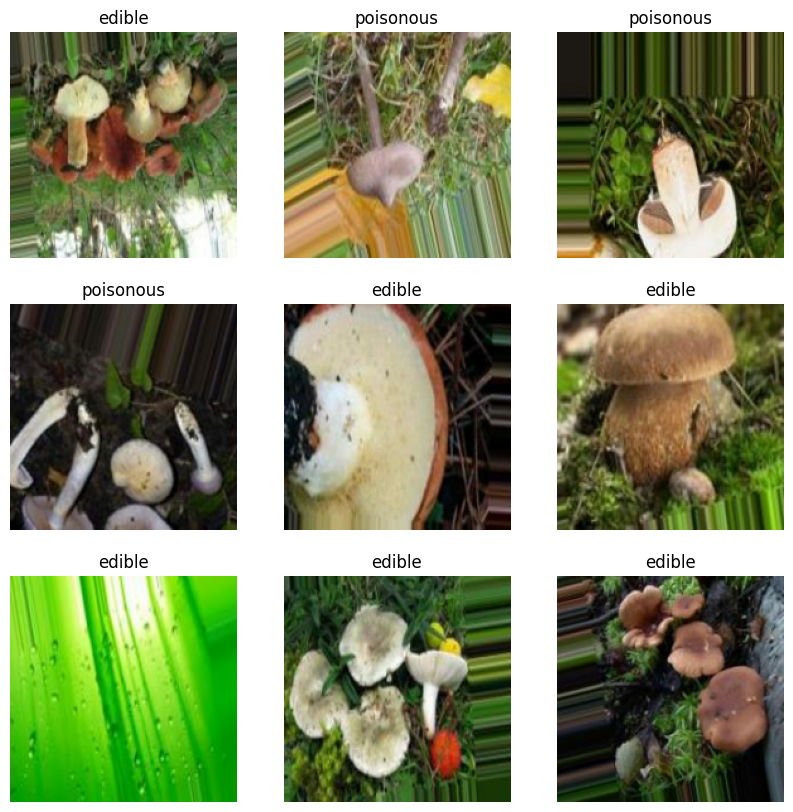

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CATEGORIES[labels[i]])
    plt.axis("off")

### 3.Optimizing Dataset Using Autotune Module from Tensorflow

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)



### 4.Normalization Layer

In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


### 5.Architecting CNN Model

In [13]:
num_classes = 2

model = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### 6.Compiling CNN Model

In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

### 7.Model Architecture

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### 8.Model Training

In [16]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
381/381 [==============================] - 55s 137ms/step - loss: 0.6674 - accuracy: 0.6141 - val_loss: 0.6433 - val_accuracy: 0.6192
Epoch 2/10
381/381 [==============================] - 52s 137ms/step - loss: 0.6314 - accuracy: 0.6495 - val_loss: 0.6282 - val_accuracy: 0.6534
Epoch 3/10
381/381 [==============================] - 55s 145ms/step - loss: 0.6209 - accuracy: 0.6512 - val_loss: 0.6238 - val_accuracy: 0.6498
Epoch 4/10
381/381 [==============================] - 51s 134ms/step - loss: 0.6137 - accuracy: 0.6657 - val_loss: 0.6220 - val_accuracy: 0.6541
Epoch 5/10
381/381 [==============================] - 47s 124ms/step - loss: 0.5909 - accuracy: 0.6852 - val_loss: 0.6399 - val_accuracy: 0.6636
Epoch 6/10
381/381 [==============================] - 50s 130ms/step - loss: 0.5612 - accuracy: 0.7078 - val_loss: 0.6364 - val_accuracy: 0.6452
Epoch 7/10
381/381 [==============================] - 49s 129ms/step - loss: 0.5051 - accuracy: 0.7507 - val_loss: 0.6749 - val_ac

### 9.Model Analysis

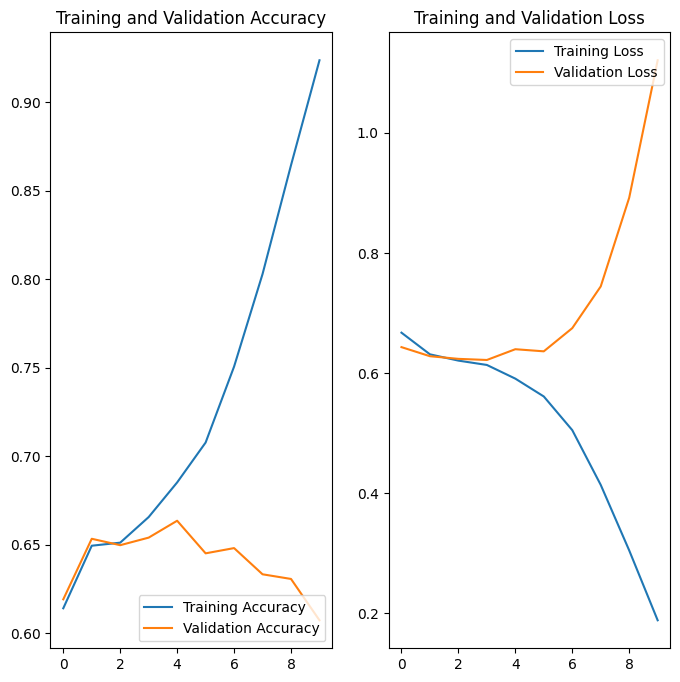

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 10.Saving Model and Model Convertion

In [19]:
model_name = 'cnn_mushroom_model'

# Menyimpan Model menjadi Saved_model Format
model.save(model_name)


# Konversi format Saved_model menjadi .tflite format
converter = tf.lite.TFLiteConverter.from_saved_model(model_name)
tflite_model = converter.convert()

# Saved Flat 
tensorflow_lite_path = os.path.join(model_name,'cnn_mushroom_model.tflite')
with open(tensorflow_lite_path, 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: cnn_mushroom_model/assets


INFO:tensorflow:Assets written to: cnn_mushroom_model/assets
2023-06-06 20:45:24.252525: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-06 20:45:24.252540: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-06-06 20:45:24.252673: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: cnn_mushroom_model
2023-06-06 20:45:24.253620: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-06-06 20:45:24.253624: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: cnn_mushroom_model
2023-06-06 20:45:24.255802: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-06-06 20:45:24.330250: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: cnn_mushroom_model
2023-06-06 20:45:24.339141: I tensorflow/cc/saved_model/loader.cc:314] Sa